In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1067043809729654907]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

In [5]:
hyper_dimension = 500
hyper_epochs = 10
hyper_batch_size = 16
hyper_feature_maps = 32
hyper_channels = 1
hyper_mode = 'grayscale'

In [6]:
# Initializing the CNN
classifier = Sequential()

# Convolution & pooling - First convolution layer
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer (same as first layer)
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Third convolution layer
classifier.add(Conv2D(hyper_feature_maps * 2, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = hyper_feature_maps * 2, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [7]:
# Creating training and validation image flows

train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory('train',
                                          target_size = (hyper_dimension,
                                                         hyper_dimension),
                                          batch_size = hyper_batch_size,
                                          class_mode = 'binary',
                                          color_mode = hyper_mode)

val_set = val_gen.flow_from_directory('val',
                                      target_size = (hyper_dimension,
                                                     hyper_dimension),
                                      batch_size = hyper_batch_size,
                                      class_mode = 'binary',
                                      color_mode = hyper_mode)

Found 4193 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


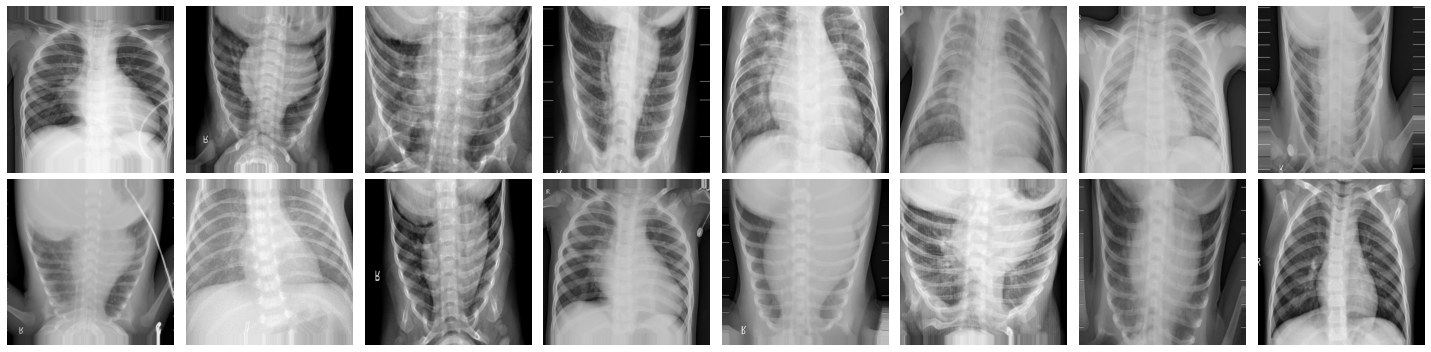

In [8]:
# Visualizing images in the first training set batch 

image_batch = train_set[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Fitting the model
start_time = datetime.now()
results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))
datetime.now() - start_time

Epoch 1/10
263/263 [==============================] - 578s 2s/step - loss: 0.4927 - accuracy: 0.7721 - val_loss: 0.2566 - val_accuracy: 0.9058
Epoch 2/10
263/263 [==============================] - 590s 2s/step - loss: 0.2711 - accuracy: 0.8881 - val_loss: 0.1830 - val_accuracy: 0.9337
Epoch 3/10
263/263 [==============================] - 597s 2s/step - loss: 0.2048 - accuracy: 0.9152 - val_loss: 0.1583 - val_accuracy: 0.9423
Epoch 4/10
263/263 [==============================] - 590s 2s/step - loss: 0.2066 - accuracy: 0.9197 - val_loss: 0.1347 - val_accuracy: 0.9538
Epoch 5/10
263/263 [==============================] - 579s 2s/step - loss: 0.1636 - accuracy: 0.9292 - val_loss: 0.1498 - val_accuracy: 0.9452
Epoch 6/10
263/263 [==============================] - 553s 2s/step - loss: 0.1861 - accuracy: 0.9252 - val_loss: 0.1527 - val_accuracy: 0.9423
Epoch 7/10
263/263 [==============================] - 535s 2s/step - loss: 0.1751 - accuracy: 0.9320 - val_loss: 0.1405 - val_accuracy: 0.9481

datetime.timedelta(seconds=5596, microseconds=876756)

In [12]:
# Creating test image flow

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('test',
                                        target_size = (hyper_dimension,
                                                       hyper_dimension),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = hyper_mode,
                                        shuffle=False)

# Making predictions

predictions = classifier.predict_generator(test_set)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 624 images belonging to 2 classes.


In [13]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,131,103
Actual Pneumonia,2,388
